In [64]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Suppress specific warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=ConvergenceWarning)

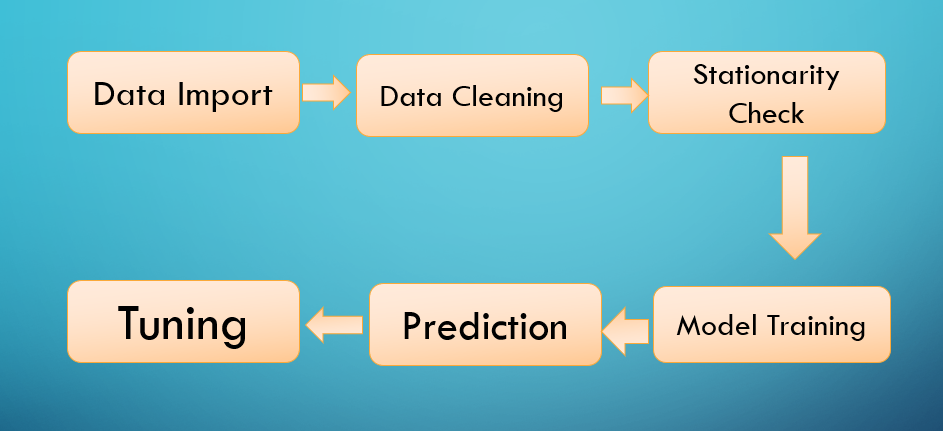

In [ ]:
from IPython.display import Image
Image(filename='Capture.png')

In [65]:
# Data and package Import
#Data Source - Kaggle - https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.api as smt
TempData = pd.read_csv('GlobalLandTemperaturesByCity.csv')
TempData.head(30)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
9,1744-08-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [66]:
#Data Cleaning
TempData = TempData.dropna()
df_Denamrk = TempData[TempData.Country == "Denmark"]

df_Denamrk.index = pd.to_datetime(df_Denamrk.dt)

df_Denamrk = df_Denamrk.drop(['dt','AverageTemperatureUncertainty'], axis=1)
df_Denamrk.describe()


,AverageTemperature
count,12664.000000
mean,7.802640
std,6.648288
min,-7.816000
25%,2.084000
50%,7.200000
75%,14.190500
max,21.437000


In [67]:
ts = df_Denamrk['AverageTemperature']
ts

dt
1743-11-01     6.068
1744-04-01     5.788
1744-05-01    10.644
1744-06-01    14.051
1744-07-01    16.082
               ...  
2013-04-01     6.026
2013-05-01    12.774
2013-06-01    15.685
2013-07-01    18.735
2013-08-01    18.067
Name: AverageTemperature, Length: 12664, dtype: float64

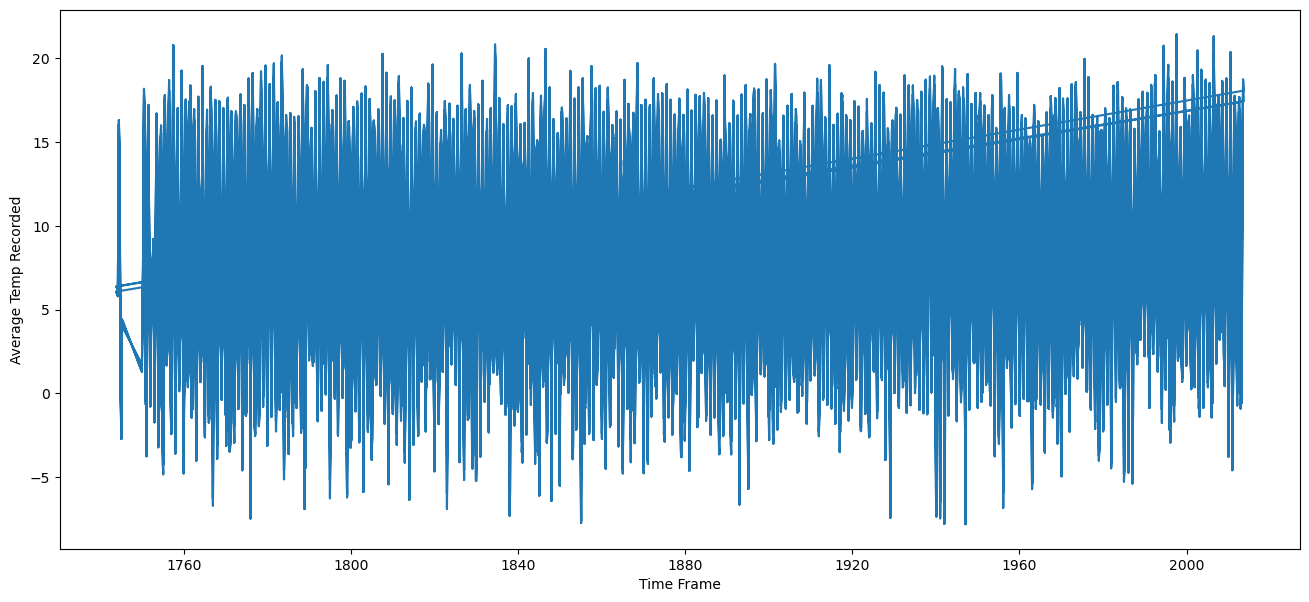

In [68]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Average Temp Recorded')
ax1.plot(ts)


In [69]:
# Perform Augmented Dickey-Fuller test:
# ADF Test - nul hypothesis - non-stationary - if p-value < 5% reject null hypothesis
from statsmodels.tsa.stattools import adfuller

adfuller_result = adfuller(ts, autolag='AIC')

print(f'p-value: {adfuller_result[1]}')

p-value: 2.3746970456361538e-27


In [70]:
#First model
newmodel = ARIMA(ts,order=(1,0,1))
results = newmodel.fit()

predictions = results.predict('01/01/1990', '01/01/1991')

In [71]:
predictions

dt
1990-01-01     2.886489
1990-02-01     5.788033
1990-03-01     6.420826
1990-04-01     6.940727
1990-05-01     8.522871
1990-06-01    13.703937
1990-07-01    14.616826
1990-08-01    15.615955
1990-09-01    15.830710
1990-10-01     9.722019
1990-11-01     8.863248
1990-12-01     2.734249
1991-01-01     3.772812
Name: predicted_mean, dtype: float64

In [72]:
actuals = df_Denamrk['01/01/1990': '01/01/1991']['AverageTemperature'][0:13]

In [73]:
actuals

dt
1990-01-01     4.267
1990-02-01     5.895
1990-03-01     6.565
1990-04-01     8.068
1990-05-01    12.944
1990-06-01    15.672
1990-07-01    16.844
1990-08-01    17.402
1990-09-01    12.446
1990-10-01     9.409
1990-11-01     4.027
1990-12-01     2.547
1991-01-01     2.088
Name: AverageTemperature, dtype: float64

In [74]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals[0:13], predictions)
print('MAE: %f' % mae)

MAE: 1.812875


### Using For Loop

In [79]:
import itertools
p = q = range(0, 4)
d = [0]
ij = itertools.product(p,d,q)
for parameters in ij:
    mod = ARIMA(ts,order=parameters)
    results = mod.fit()
    # print('ARMA{} - AIC:{}'.format(parameters, results.aic))
    print(f'ARMA{parameters} - AIC:{results.aic}')

ARMA(0, 0, 0) - AIC:83922.211326149
ARMA(0, 0, 1) - AIC:72682.79464658312
ARMA(0, 0, 2) - AIC:66966.26357224617
ARMA(0, 0, 3) - AIC:63785.44582398294
ARMA(1, 0, 0) - AIC:69020.31175733224
ARMA(1, 0, 1) - AIC:65268.10437479218
ARMA(1, 0, 2) - AIC:63179.84816606965
ARMA(1, 0, 3) - AIC:66639.60429369236
ARMA(2, 0, 0) - AIC:60366.30910254577
ARMA(2, 0, 1) - AIC:54388.11129615343
ARMA(2, 0, 2) - AIC:52219.29609766653
ARMA(2, 0, 3) - AIC:50711.73186482495
ARMA(3, 0, 0) - AIC:56175.945589050054
ARMA(3, 0, 1) - AIC:53338.63499373717
ARMA(3, 0, 2) - AIC:50396.47327782653
ARMA(3, 0, 3) - AIC:50417.74242658552


In [75]:
mod = ARIMA(ts,order=(3,0,2))
results = mod.fit()

In [76]:
predictions = results.predict('01/01/1990', '01/01/1991')

In [78]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals[0:13], predictions)
print('MAE: %f' % mae)

MAE: 1.483555


### ACF and PACF plot

- $AR(p)$ - autoregression model i.e. regression of the time series onto itself. The basic assumption is that the current series values depend on its previous values with some lag (or several lags). The maximum lag in the model is referred to as $p$. To determine the initial $p$, you need to look at the PACF plot and find the biggest significant lag after which **most** other lags become insignificant.
- $MA(q)$ - moving average model. Without going into too much detail, this models the error of the time series, again with the assumption that the current error depends on the previous with some lag, which is referred to as $q$. The initial value can be found on the ACF plot with the same logic as before. 

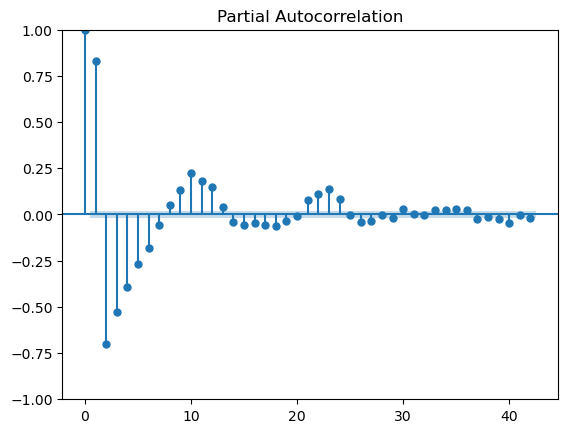

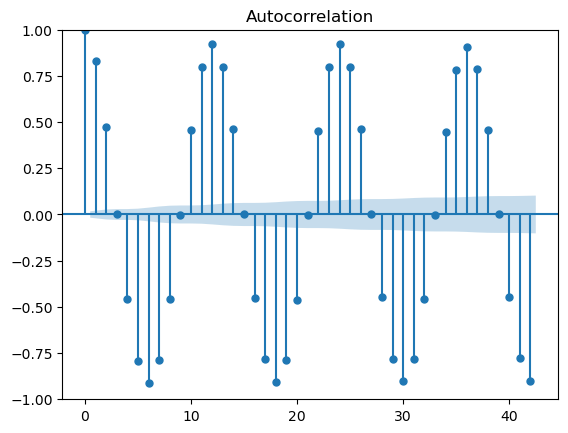

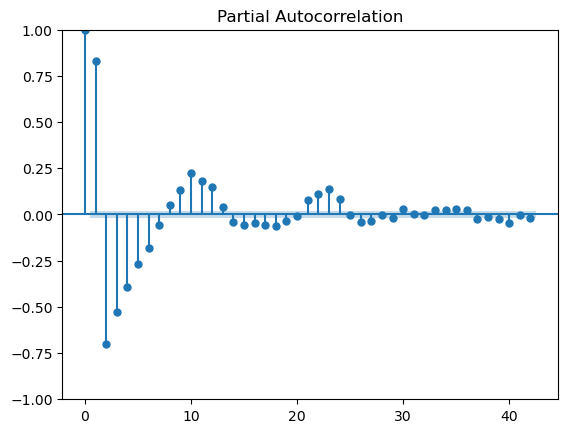

In [57]:
smt.graphics.plot_acf(ts)
smt.graphics.plot_pacf(ts)

In [82]:
mod = ARIMA(ts,order=(6,0,2))
results = mod.fit()
predictions = results.predict('01/01/1990', '01/01/1991')
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals[0:13], predictions)
print('MAE: %f' % mae)

MAE: 1.536746


In [62]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                              start_p=1,
                              start_q=1,
                              max_p=8,
                              max_q=8,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [63]:
arimamodel(ts)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=83922.211, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=69020.312, Time=1.22 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=72682.795, Time=3.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=94887.966, Time=0.45 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=60366.309, Time=1.57 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=56175.947, Time=2.12 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=54051.610, Time=2.40 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=53115.128, Time=3.66 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : AIC=52695.741, Time=4.31 sec
 ARIMA(6,0,1)(0,0,0)[0] intercept   : AIC=52677.549, Time=39.28 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=52796.879, Time=31.32 sec
 ARIMA(6,0,2)(0,0,0)[0] intercept   : AIC=52578.025, Time=37.13 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=52904.080, Time=36.49 sec
 ARIMA(6,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=39.37 sec
 ARIMA(5,0,3)(0,0,0)

ARIMA(order=(6, 0, 2), scoring_args={}, suppress_warnings=True)